# Import Libraries

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [3]:
#%cd "/content/drive/Othercomputers/My Computer/New Projects/crime_rate_USA/"

In [4]:
data_path = "Supporting data March 2022/"

In [5]:
!ls "Supporting data March 2022/"

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
estimated_crimes_data = pd.read_csv(data_path + "estimated_crimes.csv")
economics_data = pd.read_csv(data_path + "economics.csv")
demography_data = pd.read_csv(data_path + "demography.csv")
social_characteristics_data = pd.read_csv(data_path + "social_characteristics.csv")

# Exploratory data analysis

The keys points from the EDA are: 

- All the data files have two common columns that are year and state name, so we can merged all the data using these two key values
- There are total of 50 states present in the data, while records of 10 years are present for each state and are common among all the files
- 8 major crimes data are presented in the estimated crime data file
- There is no missing, null or zero values among all the files


In [7]:
estimated_crimes_data

,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total crime,overall crime rate
0,2010,AL,Alabama,4785401,18363,275,4864,11869,168828,42484,115564,10780,373027,0.077951
1,2011,AL,Alabama,4803689,20166,299,4906,13591,173192,51119,111411,10662,385346,0.080219
2,2012,AL,Alabama,4817528,21693,342,5020,15035,168878,47481,111523,9874,379846,0.078847
3,2013,AL,Alabama,4833996,20834,346,4645,13788,161835,42410,108862,10563,363283,0.075152
4,2014,AL,Alabama,4846411,20727,276,4702,13744,154087,39723,104223,10141,347623,0.071728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2016,WY,Wyoming,584910,1431,20,59,1146,11460,1771,8889,800,25576,0.043726
557,2017,WY,Wyoming,578934,1358,14,98,993,10528,1556,8211,761,23519,0.040625
558,2018,WY,Wyoming,577601,1235,14,75,885,10308,1551,7974,783,22825,0.039517
559,2019,WY,Wyoming,580116,1247,13,67,844,9097,1394,6981,722,20365,0.035105


In [8]:
economics_data

,State Name,Year,Population 16 years and over,Population in labor force,Percent in labor force,Number of civilian labor force in labor force,Percent Civilian labor force,Employed in civilian labor force,Percent Employed in civilian labor force,Unemployed in civilian labor force,Percent of Unemployed in civilian labor force,Armed Forces,Percent of Armed Forces,Number not in labor force,Percent not in labor force,Civilian labor force,Percent of Civilian labor force,Civilian employed population 16 years and over,Percent of Civilian employed population 16 years and over,"Management, business, science, and arts occupations","Percent in Management, business, science, and arts occupations",Service occupations,Percent in Service occupations,Sales and office occupations,Percent in Sales and office occupations,"Natural resources, construction, and maintenance occupations","Percent in Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations","Percent in Production, transportation, and material moving occupations",Civilian employed population 16 years and over.1,Percent of Civilian employed population 16 years and over.1,"Agriculture, forestry, fishing and hunting, and mining","Percent in Agriculture, forestry, fishing and hunting, and mining",Construction,Percent in Construction,Manufacturing,Percent in Manufacturing,Wholesale trade,Percent in Wholesale trade,Retail trade,Percent in Retail trade,"Transportation and warehousing, and utilities","Percent in Transportation and warehousing, and utilities",Information,Percent in Information,"Finance and insurance, and real estate and rental and leasing","Percent in Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Percent in Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Percent in Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Percent in Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration","Percent in Other services, except public administration",Public administration,Percent in Public administration,Civilian employed population 16 years and over.2,Percent of Civilian employed population 16 years and over.2,Private wage and salary workers,Percent Private wage and salary workers,Government workers,Percent Government workers,Self-employed in own not incorporated business workers,Percent Self-employed in own not incorporated business workers,Unpaid family workers,Percent Unpaid family workers,Income and Benefits of Total households,Percent Income and Benefits Total households,"Income and Benefits Less than $10,000","Percent Income and Benefits Less than $10,000","Income and Benefits $10,000 to $14,999","Percent Income and Benefits $10,000 to $14,999","Income and Benefits $15,000 to $24,999","Percent Income and Benefits $15,000 to $24,999","Income and Benefits $25,000 to $34,999","Percent Income and Benefits $25,000 to $34,999","Income and Benefits $35,000 to $49,999","Percent Income and Benefits $35,000 to $49,999","Income and Benefits $50,000 to $74,999","Percent Income and Benefits $50,000 to $74,999","Income and Benefits $75,000 to $99,999","Percent Income and Benefits $75,000 to $99,999","Income and Benefits $100,000 to $149,999","Percent Income and Benefits $100,000 to $149,999","Income and Benefits $150,000 to $199,999","Percent Income and Benefits $150,000 to $199,999","Income and Benefits $200,000 or more","Percent Income and Benefits $200,000 or more",Median household income,Mean household income,Income and Benefits With earnings,Percent Income and Benefits With earnings,Income and Benefits Mean earnings,Income and Benefits With Social Security,Percent Inc

In [9]:
demography_data

,Year,State Name,Total population,Number of Male,Percent of Male,Number of Female,Percent of Female,Number of 18 years and over,Percent of 18 years and over,Number Male 18 and over,Percent Male 18 and over,Number Female 18 and over,Percent Female 18 and over,Number Two or more races,Percent Two or more races,Number One race,Percent One race,Number of White,Percent of White,Number of Black or African American,Percent of Black or African American,Number of American Indian and Alaska Native,Percent of American Indian and Alaska Native,Number of Asian,Percent of Asian,Number of Native Hawaiian and Other Pacific Islander,Percent of Native Hawaiian and Other Pacific Islander,Other races,Percent Other race
0,2010,Alabama,4785298,2322243,48.5,2463055,51.5,3649870,3649870,1740071,47.7,1909799,52.3,65186,1.4,4720112,98.6,3382838,70.7,1290667,27.0,56024,1.2,64811,1.4,2500,0.1,56447,1.2
1,2010,Alaska,713985,372436,52.2,341549,47.8,525600,525600,274121,52.2,251479,47.8,50037,7.0,663948,93.0,526642,73.8,33121,4.6,137943,19.3,50131,7.0,12315,1.7,9173,1.3
2,2010,Arizona,6413737,3190700,49.7,3223037,50.3,4781326,4781326,2353852,49.2,2427474,50.8,169557,2.6,6244180,97.4,5242273,81.7,312920,4.9,333890,5.2,227244,3.5,23994,0.4,454796,7.1
3,2010,Arkansas,2921606,1430837,49.0,1490769,51.0,2210476,2210476,1069304,48.4,1141172,51.6,49157,1.7,2872449,98.3,2336002,80.0,480407,16.4,42959,1.5,38999,1.3,7764,0.3,67397,2.3
4,2010,California,37349363,18570505,49.7,18778858,50.3,28042134,28042134,13804975,49.2,14237159,50.8,1568280,4.2,35781083,95.8,24611291,65.9,2649422,7.1,670960,1.8,5540174,14.8,289873,0.8,5301856,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2019,Virginia,8535519,4201799,49.2,4333720,50.8,6677914,6677914,3246462,48.6,3431452,51.4,320232,3.8,8215287,96.2,5994267,70.2,1820891,21.3,76902,0.9,690204,8.1,16638,0.2,283087,3.3
506,2019,Washington,7614893,3807572,50.0,3807321,50.0,5951928,5951928,2958683,49.7,2993245,50.3,453495,6.0,7161398,94.0,6056387,79.5,429718,5.6,228712,3.0,883108,11.6,100352,1.3,419447,5.5
507,2019,West Virginia,1792147,885861,49.4,906286,50.6,1433329,1433329,702698,49.0,730631,51.0,32250,1.8,1759897,98.2,1697080,94.7,86426,4.8,11575,0.6,20033,1.1,1710,0.1,9790,0.5
508,2019,Wisconsin,5822434,2892804,49.7,2929630,50.3,4559022,4559022,2247843,49.3,2311179,50.7,137034,2.4,5685400,97.6,5088607,87.4,438719,7.5,92246,1.6,201512,3.5,7925,0.1,139326,2.4


In [10]:
social_characteristics_data

,Year,State Name,Percent of single mothers/fathers,Percent high school graduate or higher,Percent bachelor's degree or higher,Percent of people having the same house as previous year,Percent of foreign born,Percent not a U.S. citizen,Percent using Language other than English at home
0,2010,Alabama,0.372405,82.1,21.9,84.3,3.5,71.5,5.2
1,2011,Alabama,0.361194,82.7,22.3,84.8,3.4,64.6,5.2
2,2012,Alabama,0.356240,84.0,23.3,85.1,3.4,65.7,5.1
3,2013,Alabama,0.379877,84.5,23.5,85.1,3.4,63.1,5.1
4,2014,Alabama,0.370406,84.7,23.5,85.2,3.2,65.2,4.9
...,...,...,...,...,...,...,...,...,...
495,2015,Wyoming,0.283117,92.2,26.2,82.0,3.8,61.4,7.5
496,2016,Wyoming,0.299787,93.2,27.1,81.9,3.2,60.8,7.6
497,2017,Wyoming,0.290482,92.9,27.6,83.9,3.5,64.8,8.2
498,2018,Wyoming,0.286398,93.3,26.9,84.0,3.0,64.0,7.0


In [11]:
estimated_crimes_data.columns

Index(['year', 'state_abbr', 'state_name', 'population', 'violent_crime',
       'homicide', 'robbery', 'aggravated_assault', 'property_crime',
       'burglary', 'larceny', 'motor_vehicle_theft', 'total crime',
       'overall crime rate'],
      dtype='object')

In [12]:
### total number of states
print("total nubmer of states: ", estimated_crimes_data['state_name'].nunique())
estimated_crimes_data['state_name'].unique()

total nubmer of states:  51


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [13]:
### number of years
print("total number of years: ", estimated_crimes_data['year'].nunique())
estimated_crimes_data['year'].unique()

total number of years:  11


array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [14]:
### all columns of economics data
print("total number of columns: ", len(economics_data.columns))
for column in economics_data.columns:
  print(column)


total number of columns:  199
State Name
Year
Population 16 years and over
Population in labor force
Percent in labor force
Number of civilian labor force in labor force
Percent Civilian labor force
Employed in civilian labor force
Percent Employed in civilian labor force
Unemployed in civilian labor force
Percent of Unemployed  in civilian labor force
Armed Forces
Percent of Armed Forces
Number not in labor force
Percent not in labor force
Civilian labor force
Percent of Civilian labor force
Civilian employed population 16 years and over
Percent of Civilian employed population 16 years and over
Management, business, science, and arts occupations
Percent in Management, business, science, and arts occupations
Service occupations
Percent in Service occupations
Sales and office occupations
Percent in Sales and office occupations
Natural resources, construction, and maintenance occupations
Percent in Natural resources, construction, and maintenance occupations
Production, transportation, a

In [15]:
### checking for null values
estimated_crimes_data.isnull().values.any()

False

In [16]:
economics_data.isnull().values.any()

False

In [17]:
demography_data.isnull().values.any()

False

In [18]:
social_characteristics_data.isnull().values.any()

False

# Data Preprocesing 

In [19]:
### making the name for the column year and state name same for all the data
economics_data.rename(columns={"State Name":'state_name', "Year": 'year'}, inplace=True)
demography_data.rename(columns={"State Name":'state_name', "Year": 'year'}, inplace=True)
social_characteristics_data.rename(columns={"State Name":'state_name', "Year": 'year'}, inplace=True)

In [20]:
"""
Merging all the data using the year and state name, as they are common columns accross all the dataset
"""
all_dataframes = [economics_data, demography_data, social_characteristics_data]
merged_data = estimated_crimes_data

for data in all_dataframes:
  merged_data = merged_data.merge(data, on=['year', 'state_name'])


In [21]:
merged_data

,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total crime,overall crime rate,Population 16 years and over,Population in labor force,Percent in labor force,Number of civilian labor force in labor force,Percent Civilian labor force,Employed in civilian labor force,Percent Employed in civilian labor force,Unemployed in civilian labor force,Percent of Unemployed in civilian labor force,Armed Forces,Percent of Armed Forces,Number not in labor force,Percent not in labor force,Civilian labor force,Percent of Civilian labor force,Civilian employed population 16 years and over,Percent of Civilian employed population 16 years and over,"Management, business, science, and arts occupations","Percent in Management, business, science, and arts occupations",Service occupations,Percent in Service occupations,Sales and office occupations,Percent in Sales and office occupations,"Natural resources, construction, and maintenance occupations","Percent in Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations","Percent in Production, transportation, and material moving occupations",Civilian employed population 16 years and over.1,Percent of Civilian employed population 16 years and over.1,"Agriculture, forestry, fishing and hunting, and mining","Percent in Agriculture, forestry, fishing and hunting, and mining",Construction,Percent in Construction,Manufacturing,Percent in Manufacturing,Wholesale trade,Percent in Wholesale trade,Retail trade,Percent in Retail trade,"Transportation and warehousing, and utilities","Percent in Transportation and warehousing, and utilities",Information,Percent in Information,"Finance and insurance, and real estate and rental and leasing","Percent in Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Percent in Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Percent in Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Percent in Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration","Percent in Other services, except public administration",Public administration,Percent in Public administration,Civilian employed population 16 years and over.2,Percent of Civilian employed population 16 years and over.2,Private wage and salary workers,Percent Private wage and salary workers,Government workers,Percent Government workers,Self-employed in own not incorporated business workers,Percent Self-employed in own not incorporated business workers,Unpaid family workers,Percent Unpaid family workers,Income and Benefits of Total households,Percent Income and Benefits Total households,"Income and Benefits Less than $10,000","Percent Income and Benefits Less than $10,000","Income and Benefits $10,000 to $14,999","Percent Income and Benefits $10,000 to $14,999","Income and Benefits $15,000 to $24,999","Percent Income and Benefits $15,000 to $24,999","Income and Benefits $25,000 to $34,999","Percent Income and Benefits $25,000 to $34,999","Income and Benefits $35,000 to $49,999","Percent Income and Benefits $35,000 to $49,999","Income and Benefits $50,000 to $74,999","Percent Income and Benefits $50,000 to $74,999","Income and Benefits $75,000 to $99,999","Percent Income and Benefits $75,000 to $99,999","Income and Benefits $100,000 to $149,999","Percent Income and Benefits $100,000 to $149,999","Income and Benefits $150,000 to $199,999","Percent Income and Benefits $150,000 to $199,999","Income and Benefits $200,000 or more","Percent Income and Benefits $200,000 or more",Median household income,Mean household income,Income 

In [22]:
estimated_crimes_data['state_name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [23]:
## verifying the total number of columns
sum = len(estimated_crimes_data.columns)
for data in all_dataframes:
  sum += len(data.columns) - 2

if sum == len(merged_data.columns):
  print("Verified - same number of columns")

Verified - same number of columns


In [24]:
def label_encoder(df, column_name):
  """
  This function will label encode the column of the dataframe
  """
  le = LabelEncoder()
  df[column_name] = le.fit_transform(df[column_name])
  return df

In [25]:
def is_series(df):
    return isinstance(df, pd.Series)


def normalize(df):
  """
  This function will normalize the dataframe
  """
  scaler =  MinMaxScaler()
  if is_series(df):
    return (df - df.mean())/ df.std()
  
  df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
  return df

In [26]:
merged_data

,year,state_abbr,state_name,population,violent_crime,homicide,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total crime,overall crime rate,Population 16 years and over,Population in labor force,Percent in labor force,Number of civilian labor force in labor force,Percent Civilian labor force,Employed in civilian labor force,Percent Employed in civilian labor force,Unemployed in civilian labor force,Percent of Unemployed in civilian labor force,Armed Forces,Percent of Armed Forces,Number not in labor force,Percent not in labor force,Civilian labor force,Percent of Civilian labor force,Civilian employed population 16 years and over,Percent of Civilian employed population 16 years and over,"Management, business, science, and arts occupations","Percent in Management, business, science, and arts occupations",Service occupations,Percent in Service occupations,Sales and office occupations,Percent in Sales and office occupations,"Natural resources, construction, and maintenance occupations","Percent in Natural resources, construction, and maintenance occupations","Production, transportation, and material moving occupations","Percent in Production, transportation, and material moving occupations",Civilian employed population 16 years and over.1,Percent of Civilian employed population 16 years and over.1,"Agriculture, forestry, fishing and hunting, and mining","Percent in Agriculture, forestry, fishing and hunting, and mining",Construction,Percent in Construction,Manufacturing,Percent in Manufacturing,Wholesale trade,Percent in Wholesale trade,Retail trade,Percent in Retail trade,"Transportation and warehousing, and utilities","Percent in Transportation and warehousing, and utilities",Information,Percent in Information,"Finance and insurance, and real estate and rental and leasing","Percent in Finance and insurance, and real estate and rental and leasing","Professional, scientific, and management, and administrative and waste management services","Percent in Professional, scientific, and management, and administrative and waste management services","Educational services, and health care and social assistance","Percent in Educational services, and health care and social assistance","Arts, entertainment, and recreation, and accommodation and food services","Percent in Arts, entertainment, and recreation, and accommodation and food services","Other services, except public administration","Percent in Other services, except public administration",Public administration,Percent in Public administration,Civilian employed population 16 years and over.2,Percent of Civilian employed population 16 years and over.2,Private wage and salary workers,Percent Private wage and salary workers,Government workers,Percent Government workers,Self-employed in own not incorporated business workers,Percent Self-employed in own not incorporated business workers,Unpaid family workers,Percent Unpaid family workers,Income and Benefits of Total households,Percent Income and Benefits Total households,"Income and Benefits Less than $10,000","Percent Income and Benefits Less than $10,000","Income and Benefits $10,000 to $14,999","Percent Income and Benefits $10,000 to $14,999","Income and Benefits $15,000 to $24,999","Percent Income and Benefits $15,000 to $24,999","Income and Benefits $25,000 to $34,999","Percent Income and Benefits $25,000 to $34,999","Income and Benefits $35,000 to $49,999","Percent Income and Benefits $35,000 to $49,999","Income and Benefits $50,000 to $74,999","Percent Income and Benefits $50,000 to $74,999","Income and Benefits $75,000 to $99,999","Percent Income and Benefits $75,000 to $99,999","Income and Benefits $100,000 to $149,999","Percent Income and Benefits $100,000 to $149,999","Income and Benefits $150,000 to $199,999","Percent Income and Benefits $150,000 to $199,999","Income and Benefits $200,000 or more","Percent Income and Benefits $200,000 or more",Median household income,Mean household income,Income 

In [27]:
X = merged_data.drop(columns = ['year','state_name', 'state_abbr', 'violent_crime',
       'homicide', 'robbery', 'aggravated_assault', 'property_crime',
       'burglary', 'larceny', 'motor_vehicle_theft', 'total crime',
       'overall crime rate'], axis=1)

y = merged_data[['violent_crime',
       'homicide', 'robbery', 'aggravated_assault', 'property_crime',
       'burglary', 'larceny', 'motor_vehicle_theft', 'total crime',
       'overall crime rate']]

In [28]:
## normalizing all the data
X_normalized = normalize(X)

X_normalized['state_name'] = merged_data['state_name']

## finding the top influence features

In [29]:
features  = X_normalized
features['overall crime rate'] = normalize(y['overall crime rate'])
correlation = features.corr()['overall crime rate'].sort_values()

print("Top Positive Influences:")
print(correlation.tail(30))

print("\n\n\nTop Negative Influences:")
print(correlation.head(30))

Top Positive Influences:
Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present                                                       0.404679
Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Unrelated individuals 15 years and over                                                                    0.406149
Percent!!Income and Benefits !!$35,000 to $49,999                                                                                                                                                                    0.419122
Percent of single mothers/fathers                                                                                                                                                                                    0.424491
Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW 

In [30]:
## splitting the data
X_train, X_test, y_train_, y_test_ = train_test_split(X_normalized, y, test_size=0.2, random_state=15, stratify=X_normalized['state_name'])
X_train = X_train.drop(columns =['state_name', 'overall crime rate'], axis=1)
X_test = X_test.drop(columns =['state_name', 'overall crime rate'], axis=1)

# Buidling model for predicting the any state total crimes and their crime rates using all features

In [31]:
### selecting the appropraite colunms
y_train = y_train_[['total crime', 'overall crime rate']]
y_test = y_test_[['total crime', 'overall crime rate']] 

In [32]:
model_all_data = RandomForestRegressor(n_estimators=500)

model_all_data .fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [33]:
### testing the model
y_pred = model_all_data .predict(X_test)
r2_score_ = r2_score(y_test, y_pred)
r2_score_

0.936354243200467

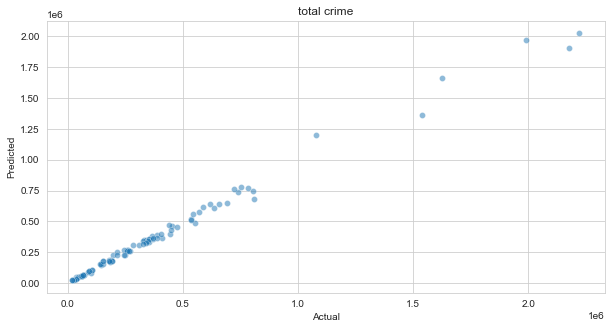

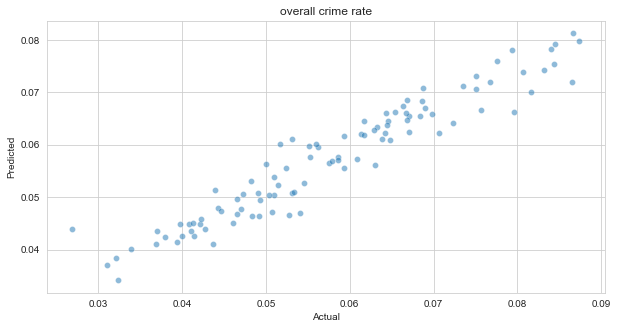

In [34]:
## plot the y_test and y_pred values using seaborn and matplotlib
def plot(y_test, y_pred, title):
  plt.figure(figsize=(10, 5))
  sns.set_style("whitegrid")
  sns.scatterplot(y_test, y_pred, alpha=0.5)
  plt.title(title)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.show()
  

for target in y_test.columns:
  plot(y_test[target], y_pred[:,y_test.columns.get_loc(target)], target)


In [35]:
### predicting for random examples
def predict_sample(X_test, y_test, index):
  sample = np.array(X_test.iloc[index]).reshape(1, -1)
  values = model_all_data.predict(sample)

  print(f"original - crime rate: {y_test['overall crime rate'].iloc[index]}")
  print(f"Predicted - crime rate: {values[0][1]}")

In [36]:
rand_index = np.random.randint(0, len(X_test))
predict_sample(X_test, y_test, rand_index)

original - crime rate: 0.04137290486
Predicted - crime rate: 0.04512447454370016


In [37]:
importances = model_all_data.feature_importances_

In [38]:
indices = importances.argsort()

## showing top-30 least important features 
for index in indices[:30]:
  print(f"Feature Name: {np.array(X_train.columns)[index]}, It's importance: {importances[index]}")

Feature Name: Percent Unpaid family workers, It's importance: 1.9893094025676973e-06
Feature Name: Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!18 years and over, It's importance: 1.0035056451456737e-05
Feature Name: Income and Benefits Mean earnings, It's importance: 1.0210724499092925e-05
Feature Name: Estimate!!Income and Benefits !!Median family income, It's importance: 1.4124451250956632e-05
Feature Name: Percent Income and Benefits $10,000 to $14,999, It's importance: 1.527396900242469e-05
Feature Name: Percent!!PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL!!Families with female householder, no husband present, It's importance: 1.576591513542017e-05
Feature Name: Percent in Management, business, science, and arts occupations, It's importance: 1.6972538989004056e-05
Feature Name: Percent in Other services, except public administration, It's importance: 1.7801760351312915e

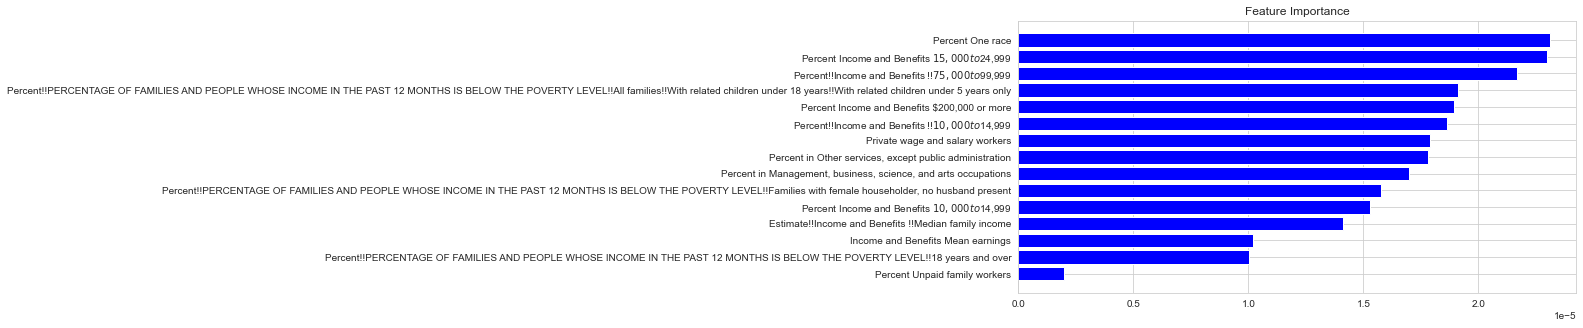

In [39]:
### plot the top 15 least important features with thier importance
def plot_features_importance(importances, indices, title):
  plt.figure(figsize=(10, 5))
  plt.title(title)
  plt.barh(np.array(X_train.columns)[indices], importances[indices], color="b", align="center")
  plt.show()

plot_features_importance(importances, indices[:15], "Feature Importance")

In [40]:
## showing top-30 most important features 
for index in indices[-30:]:
  print(f"Feature Name: {np.array(X_train.columns)[index]}, It's importance: {importances[index]}")

Feature Name: Percent!!HEALTH INSURANCE COVERAGE!!Civilian noninstitutionalized population, It's importance: 0.00509685931455052
Feature Name: Total population, It's importance: 0.005345354627637901
Feature Name: Number of Male, It's importance: 0.0063980799974988735
Feature Name: Government workers, It's importance: 0.006577825223560129
Feature Name: population, It's importance: 0.006721982658066665
Feature Name: Number Male 18 and over, It's importance: 0.008601773724910713
Feature Name: Estimate!!Income and Benefits !!Less than $10,000, It's importance: 0.00908508826997165
Feature Name: Estimate!!HEALTH INSURANCE COVERAGE!!Not in labor force, It's importance: 0.009546198263396533
Feature Name: Percent!!HEALTH INSURANCE COVERAGE!!Not in labor force, It's importance: 0.010073054998056833
Feature Name: Estimate!!Income and Benefits !!With Food Stamp/SNAP benefits in the past 12 months, It's importance: 0.01496222518501781
Feature Name: Public administration, It's importance: 0.01802579

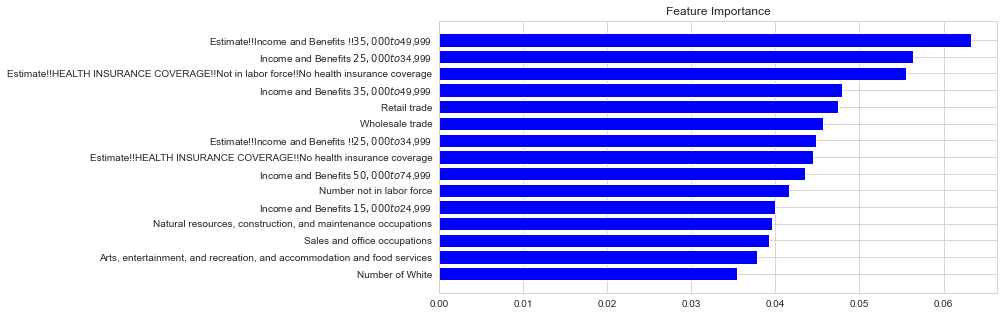

In [41]:
### plot the top 15 most important features with thier importance
def plot_features_importance(importances, indices, title):
  plt.figure(figsize=(10, 5))
  plt.title(title)
  plt.barh(np.array(X_train.columns)[indices], importances[indices], color="b", align="center")
  plt.show()

plot_features_importance(importances, indices[-15:], "Feature Importance")

# Building and training models for the state crimes and crime rate predictions using top 100 features


In [42]:
### top 50 positive influence features for train data
top_fifty_positive = list(correlation.tail(51).index)
top_fifty_positive = list(filter(lambda x: x!='overall crime rate', top_fifty_positive))
top_100_influence_features_train = X_train[top_fifty_positive]

### adding top 30 negative influence features for train data
top_fifty_negative = list(correlation.head(51).index)
top_fifty_negative = list(filter(lambda x: x!='overall crime rate', top_fifty_negative))
top_100_influence_features_train[top_fifty_negative] = X_train[top_fifty_negative]


In [43]:
### top 50 positive influence features for test data
top_fifty_positive = list(correlation.tail(51).index)
top_fifty_positive = list(filter(lambda x: x!='overall crime rate', top_fifty_positive))
top_100_influence_features_test = X_test[top_fifty_positive]

### adding top 30 negative influence features for test data
top_fifty_negative = list(correlation.head(51).index)
top_fifty_negative = list(filter(lambda x: x!='overall crime rate', top_fifty_negative))
top_100_influence_features_test[top_fifty_negative] = X_test[top_fifty_negative]

In [44]:
model = RandomForestRegressor(n_estimators=500)

model.fit(top_100_influence_features_train, y_train)

RandomForestRegressor(n_estimators=500)

In [45]:
### testing the model
y_pred = model.predict(top_100_influence_features_test)
r2_score_ = r2_score(y_test, y_pred)
r2_score_

0.9031892563925803

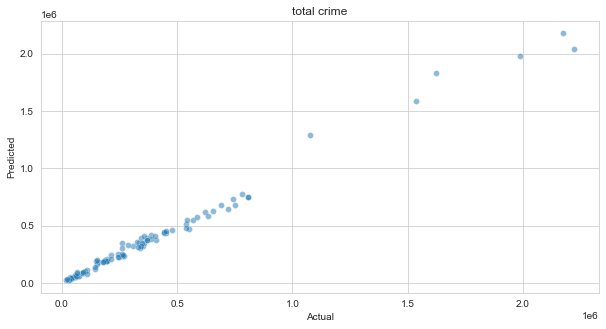

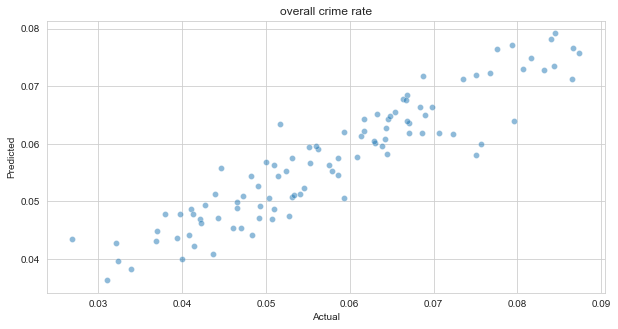

In [46]:
## plot the y_test and y_pred values using seaborn and matplotlib
def plot(y_test, y_pred, title):
  plt.figure(figsize=(10, 5))
  sns.set_style("whitegrid")
  sns.scatterplot(y_test, y_pred, alpha=0.5)
  plt.title(title)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.show()
  

for target in y_test.columns:
  plot(y_test[target], y_pred[:,y_test.columns.get_loc(target)], target)

# Building and training models for the state crimes and crime rate predictions using top 100 features PCA

In [47]:
## function for dimenetionality reduction using PCA
def reduce_dimensions(X_train, X_test, n_components):
  pca = PCA(n_components=n_components)
  X_train = pca.fit_transform(X_train)
  X_test = pca.transform(X_test)
  return X_train, X_test

In [48]:
X_train_reduce, X_test_reduce = reduce_dimensions(X_train, X_test, 100)

In [49]:
model = RandomForestRegressor(n_estimators=500)

model.fit(X_train_reduce, y_train)

RandomForestRegressor(n_estimators=500)

In [50]:
### testing the model
y_pred = model.predict(X_test_reduce)
r2_score_ = r2_score(y_test, y_pred)
r2_score_

0.7518738770240192

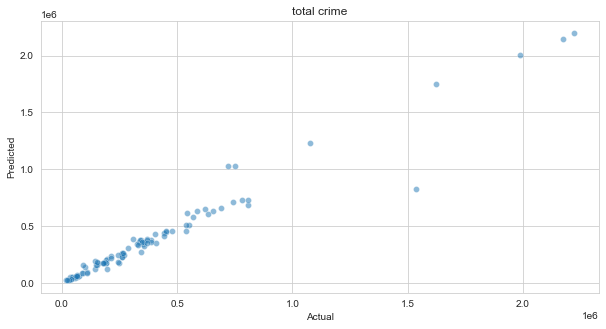

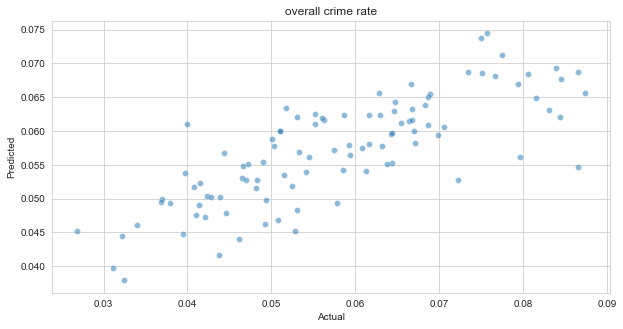

In [51]:
## plot the y_test and y_pred values using seaborn and matplotlib
def plot(y_test, y_pred, title):
  plt.figure(figsize=(10, 5))
  sns.set_style("whitegrid")
  sns.scatterplot(y_test, y_pred, alpha=0.5)
  plt.title(title)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.show()
  

for target in y_test.columns:
  plot(y_test[target], y_pred[:,y_test.columns.get_loc(target)], target)

# The Crime rate of the whole USA
- first we have group by the data using year, as the dataset contain data for the past 10 years 
- we have sum all the columns except for those containing percentage values
- we have take the means for all the values containing percentage values

In [52]:
test = merged_data
### sum all the rows of the dataframe, group by year while averaging those columns which name contain 'Percent'
def sum_all_rows(df):
  df = df.groupby('year')
  
  # take means of those columns which name contain 'Percent' using regex
  df_mean = df.mean().filter(regex='Percent')
  
  ## remove the colums year and state_name, state abbr
  #df = df.drop(columns=['year', 'state_name', 'state_abbr'], axis=1)

  # sum all the columns that doesn't contain 'Percent' in their name
  df_sum = df.sum().filter(regex=r'^(?!Percent)')
  
  # concat the two dataframes , df_mean and df_sum
  df = pd.concat([df_mean, df_sum], axis=1)

  return df

In [53]:
data = sum_all_rows(test)


In [54]:
x_data_ = data.drop(columns = ['violent_crime',
       'homicide', 'robbery', 'aggravated_assault', 'property_crime',
       'burglary', 'larceny', 'motor_vehicle_theft', 'total crime',
       'overall crime rate'], axis=1)

y_data_ = data[['violent_crime',
       'homicide', 'robbery', 'aggravated_assault', 'property_crime',
       'burglary', 'larceny', 'motor_vehicle_theft', 'total crime',
       'overall crime rate']]

In [55]:
## we have recalculate the original crime rate by dividing the total crimes in the US by the total population in the US
y_data_['overall crime rate'] = np.array(data[['total crime']]) / np.array(data[['population']])

In [56]:
x_data = normalize(x_data_)

In [57]:
rand_index = np.random.randint(0, len(y_data_))
print("Year: ", x_data_.index[rand_index])
print("US Crime Rate Prediction: ")
predict_sample(x_data, y_data_, rand_index)

Year:  2015
US Crime Rate Prediction: 
original - crime rate: 0.057182335668313586
Predicted - crime rate: 0.060879700353980014


In [96]:
rand_index = np.random.randint(0, len(y_data_))
print("Year: ", x_data_.index[rand_index])
print("US Crime Rate Prediction: ")
predict_sample(x_data, y_data_, rand_index)

Year:  2017
US Crime Rate Prediction: 
original - crime rate: 0.054630919641808946
Predicted - crime rate: 0.058688388508779894


# Crime rate Prediction of any particular two crimes for state
- for this section, we will choose robbary and aggravated assault 

In [58]:
y['robbery crime rate'] = np.array(y[['robbery']]) / np.array(X[['population']])
y['aggravated assault crime rate'] = np.array(y[['aggravated_assault']]) / np.array(X[['population']])

In [59]:
## splitting the data
X_normalized = normalize(X)
X_normalized['state_name'] = merged_data['state_name']

X_train, X_test, y_train_, y_test_ = train_test_split(X_normalized, y, test_size=0.2, random_state=15, stratify=X_normalized['state_name'])

X_train = X_train.drop(columns =['state_name'], axis=1)
X_test = X_test.drop(columns =['state_name'], axis=1)


In [60]:
### selecting the appropraite colunms
y_train = y_train_[['robbery', 'aggravated_assault', 'robbery crime rate', 'aggravated assault crime rate']]
y_test = y_test_[['robbery', 'aggravated_assault','robbery crime rate', 'aggravated assault crime rate']] 

In [61]:
X_train.shape

(400, 232)

In [62]:
model_all_data_2 = RandomForestRegressor(n_estimators=500)

model_all_data_2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [63]:
### testing the model
y_pred = model_all_data_2.predict(X_test)
r2_score_ = r2_score(y_test, y_pred)
r2_score_

0.9500673078187547

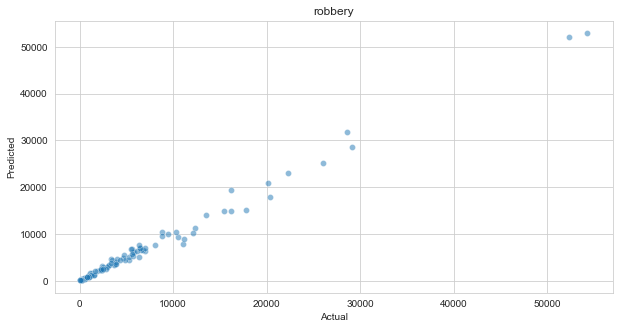

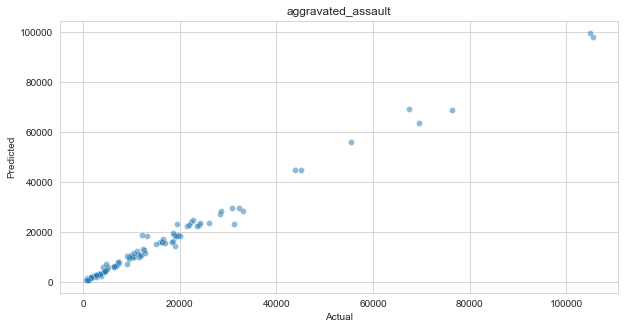

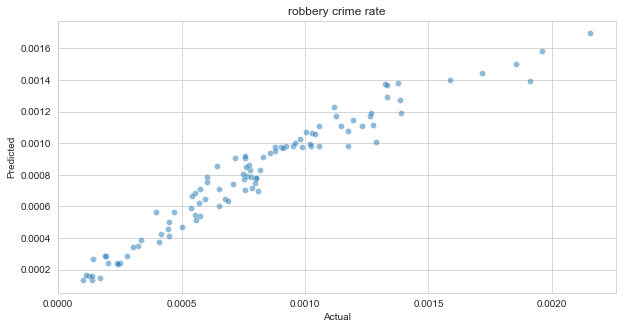

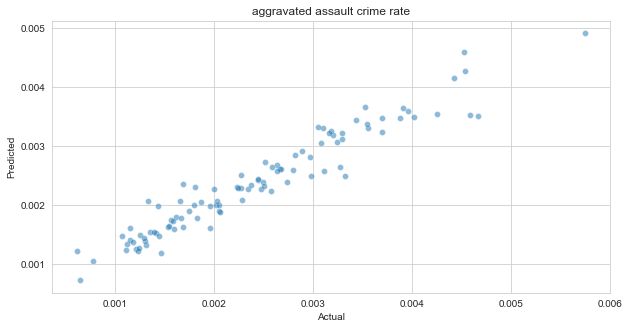

In [64]:
## plot the y_test and y_pred values using seaborn and matplotlib
def plot(y_test, y_pred, title):
  plt.figure(figsize=(10, 5))
  sns.set_style("whitegrid")
  sns.scatterplot(y_test, y_pred, alpha=0.5)
  plt.title(title)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.show()
  

for target in y_test.columns:
  plot(y_test[target], y_pred[:,y_test.columns.get_loc(target)], target)

In [65]:
### predicting for random examples
def predict_sample_for_2_crimes(X_test, y_test, index):
  sample = np.array(X_test.iloc[index]).reshape(1, -1)
  values = model_all_data_2.predict(sample)

  print(f"original - robbery crime rate: {y_test['robbery crime rate'].iloc[index]}")
  print(f"Predicted - robbery crime  rate: {values[0][2]}")
  
  print()

  print(f"original - aggravated_assault crime rate: {y_test['aggravated assault crime rate'].iloc[index]}")
  print(f"Predicted - aggravated assault crime rate: {values[0][3]}")

In [66]:
rand_index = np.random.randint(0, len(X_test))
predict_sample_for_2_crimes(X_test, y_test, rand_index)

original - robbery crime rate: 0.000688758457679639
Predicted - robbery crime  rate: 0.0006321805703330421

original - aggravated_assault crime rate: 0.0022774613944474102
Predicted - aggravated assault crime rate: 0.0020800518348402484


# Crime rate Prediction of any particular two crimes for whole USA

In [67]:
x_data.index

RangeIndex(start=0, stop=10, step=1)

In [68]:
## define empty dataframe y_data with index as the years
y_data = pd.DataFrame(index=x_data.index)

In [69]:
## we have recalculate the original crime rate by dividing the total crimes in the US by the total population in the US
y_data['robbery crime rate'] = np.array(data[['robbery']]) / np.array(data[['population']])
y_data['aggravated assault crime rate'] = np.array(data[['aggravated_assault']]) / np.array(data[['population']])

In [70]:
rand_index = np.random.randint(0, len(y_data))
print("Year: ", x_data_.index[rand_index])
print("US Crime Rate Prediction: ")
predict_sample_for_2_crimes(x_data, y_data, rand_index)

Year:  2016
US Crime Rate Prediction: 
original - robbery crime rate: 0.001020374840173
Predicted - robbery crime  rate: 0.0011750673975691505

original - aggravated_assault crime rate: 0.0024755547892535076
Predicted - aggravated assault crime rate: 0.002530779155604272
